In [1]:
import pandas as pd

In [2]:
# Load the Titanic dataset
titanic=pd.read_csv('F:/Parikshit/College/Intership/CODSOFT/TITANIC SURVIVAL PREDICTION/train.csv')

In [3]:
# Data Analysis
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.drop(['Cabin'], axis=1, inplace=True)

In [7]:
# Data Preprocessing
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])

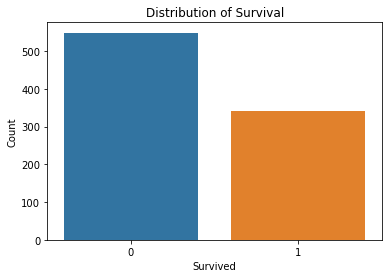

In [8]:
# Visualize the distribution of survival
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [9]:
# Feature Selection
y = titanic['Survived']
X = titanic[['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [10]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)

In [11]:
# Model Selection and Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2529)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2529)

In [12]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [13]:
print(accuracy)

0.8212290502793296


In [14]:
print(conf_matrix)

[[95 15]
 [17 52]]


In [15]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

